### APRENDIZAJE PROFUNDO PARA PROCESAMIENTO DE INFORMACIÓN BIOMÉTRICA

# PRÁCTICA 1
### GRUPO 
* Hajar Boulehdid
* Sofía Santos Schmick
* Andrés Teruel Fernández

---


In [1]:
import os

# Remove most annoying tensorflow warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from andres_face_recognition_main import *

---

## CARGA DE LOS DATOS.

In [2]:
embeddings_10_ppl_dataset, embeddings_1000_dataset = load_datasets()

Embeddings dataset already exists. Loading...
Embeddings dataset already exists. Loading...
Embeddings datasets loaded.


---

## TAREA 1.0:

 - Revisa y entiende el código
 - Compara con la imagen 2 o 3 con las anterires.

In [3]:
""""Comparamos si son la misma persona a través de una simple.Detectamos las caras de las imagenes. Imagen0 y Imagen1"""
images_dir = os.path.join('..', 'data', 'imagenes')
images = [os.path.join(images_dir, f"{i}.jpg") for i in range(4)]

for i in range(len(images)):
    for j in range(i + 1, len(images)):
        image1 = images[i]
        image2 = images[j]
        
        print(f"Image {i} vs image {j}: ", end='')
        compare_images(image1, image2)

Image 0 vs image 1: Las imágenes pertenecen a la misma persona con similitud 0.61
Image 0 vs image 2: Las imágenes pertenecen a diferentes personas con similitud 0.33
Image 0 vs image 3: Las imágenes pertenecen a diferentes personas con similitud 0.36
Image 1 vs image 2: Las imágenes pertenecen a diferentes personas con similitud 0.38
Image 1 vs image 3: Las imágenes pertenecen a diferentes personas con similitud 0.24
Image 2 vs image 3: Las imágenes pertenecen a diferentes personas con similitud 0.21


---

## TAREA 1.1: 

 - Generate a small database with a minimum of 3 images per person and 10 persons.
 - Develop a script to calculate the FAR and FRR curves.   

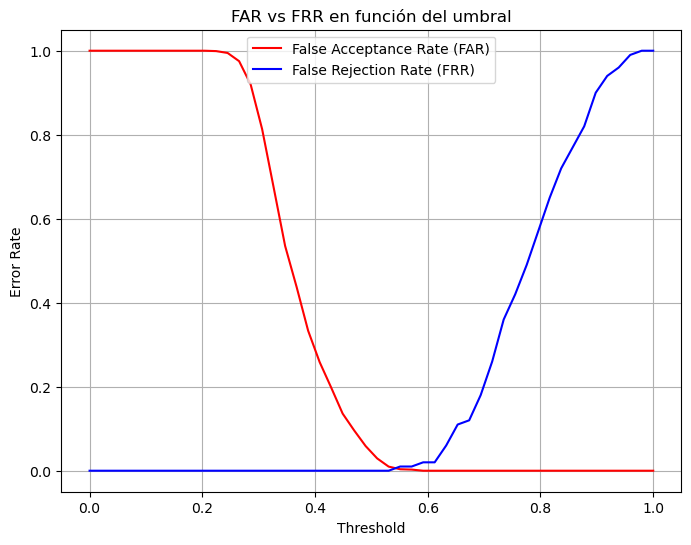

In [4]:
# Generar FAR, FRR y el gráfico
fars, frrs = calculate_far_frr_plot(embeddings_10_ppl_dataset)

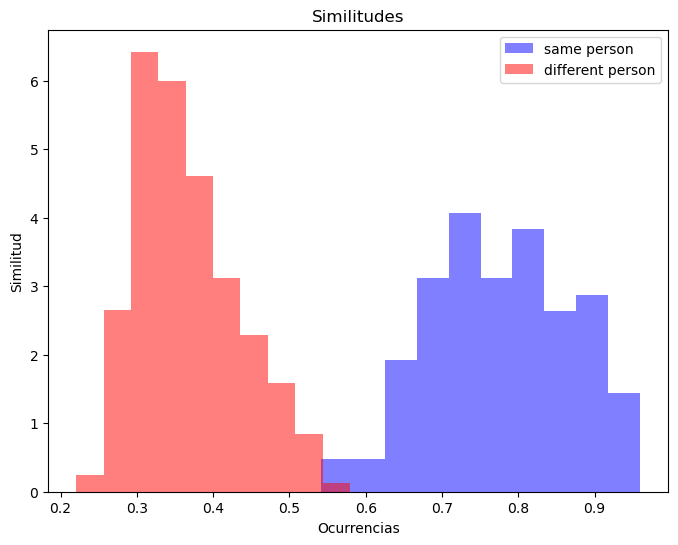

In [5]:
same_person, different_person = calcular_histograma_similitudes(embeddings_10_ppl_dataset)

---

## TAREA 1.2:

 - Read the DiveFace database and obtain the embeddings of 50 face images (1 image per subject) from the 6 demographic groups (50*6=300 embeddings in total).
 - DiveFace contains face images from 3 demographic groups (3 ethnicity and 2 gender)

In [6]:
# Llamar a la función para crear la base de datos de embeddings
embeddings_db_demographic = create_embeddings_subset(embeddings_1000_dataset, 300)

# Verificar la cantidad de embeddings por grupo
for group_name, embeddings in embeddings_db_demographic.items():
    print(f"{group_name}: {len(embeddings)} embeddings")

MN4K_120: 300 embeddings
HN4K_120: 300 embeddings
MB4K_120: 300 embeddings
HB4K_120: 300 embeddings
HA4K_120: 300 embeddings
MA4K_120: 300 embeddings


---

## TAREA 1.3:

 - Using t-SNE, represent the embeddings and its demographic group. Can you differentiate the different demographic groups?
 

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


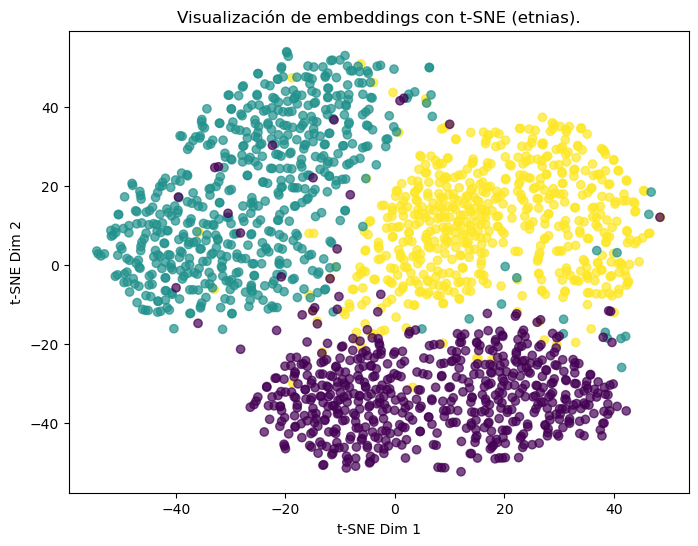

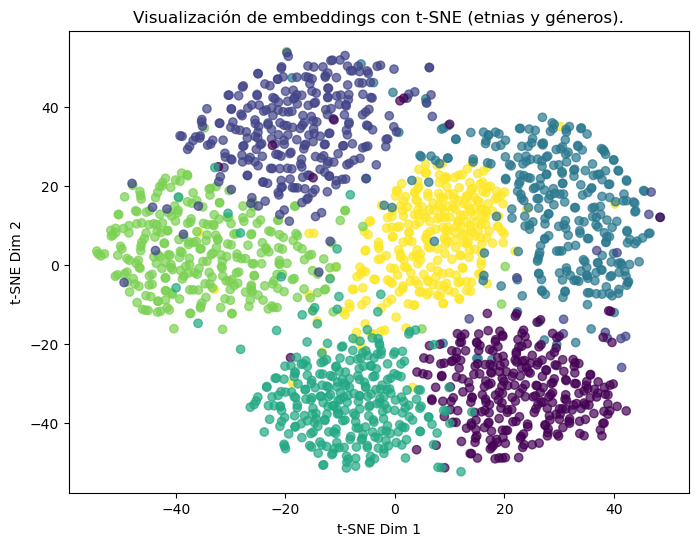

In [7]:
# Aplicar t-SNE a los embeddings
apply_tsne(embeddings_db_demographic)

---

## TAREA 2.1:
 * Train 3 different Gender Classifiers (previous Task 1.4) using images from same ethnic group: Model A (only Asian), Model B (only Black), Model C (only Caucasian).

In [11]:
embeddings = divide_embeddings(embeddings_1000_dataset)

gender_models = {'A': None,
                 'B': None,
                 'N': None}

for ethnicity in gender_models.keys():
    gender_models[ethnicity], accuracy, val_accuracy = train_gender_model(
        embeddings[ethnicity]["x_train"], 
        embeddings[ethnicity]["y_train"], 
        embeddings[ethnicity]["x_test"], 
        embeddings[ethnicity]["y_test"]) 
    
    print(f"Model {ethnicity} trained.)

Model A trained
Model B trained
Model N trained


---

## TAREA 2.2:
 * Evaluate the 3 Gender Classifiers (previous Task 2.1) using images from each of the three ethnic groups.
 * Evaluation: **3 test sets** x **3 models** = **9 accuracies**

In [12]:
get_all_accuracies_table(gender_models, embeddings)

,Model A,Model B,Model N
Dataset A,99.550003,83.099997,93.800002
Dataset B,87.150002,99.699998,87.699997
Dataset N,96.700001,89.450002,99.049997


---

## TAREA 2.3:
 * Train one Gender Classifiers (previous Task 1.4) using images from all three ethnic groups.

In [10]:
generic_model = 

Trainning 'model N' Accuracy: 100.00%
Validation 'model N' Accuracy: 97.62%



---

## TAREA 2.4:
 * Evaluate the Gender Classifier (previous Task 2.3) using images from each of the three ethnic groups.
 * Evaluation: **3 test sets** x **1 models** = **3 accuracies**